# Limpieza de datos - Data Wrangling (cirugía de los datos)

## Resumen

+ Data Warngling
+ Buscar un subconjunto de datos de un dataset
+ Subconjuntos de filas con ciertas condiciones
+ Subconjuntos con loc e iloc y creación de nuevas columnas
+ Generación de números aleatorios
+ La semilla de la generación aleatoria

El **data wrangling**, a veces denominada **data munging**, es el proceso de transformar y mapear datos de un dataset raw (en bruto) en otro formato con la intención de hacerlo más apropiado y valioso para una variedad de propósitos posteriores, como el análisis. Un data wrangler es una persona que realiza estas operaciones de transformación.

Esto puede incluir *munging*, visualización de datos, agregación de datos, entrenamiento de un modelo estadístico, así como muchos otros usos potenciales. La oscilación de datos como proceso generalmente sigue un conjunto de pasos generales que comienzan extrayendo los datos en forma cruda del origen de datos, dividiendo los datos en bruto usando algoritmos (por ejemplo, clasificación) o analizando los datos en estructuras de datos predefinidas, y finalmente depositando el contenido resultante en un sistema de almacenamiento (o silo) para su uso futuro.

## Algunas chuletas de pandas para Data Wrangling

Ahí va una pequeña chuleta de Pandas. También os recomiendo que os unáis al [Pydata](https://pydata.org). ¡Es una comunidad muy grande y potente de uso de Python para el análisis de datos con eventos y meetups en todo el mundo!

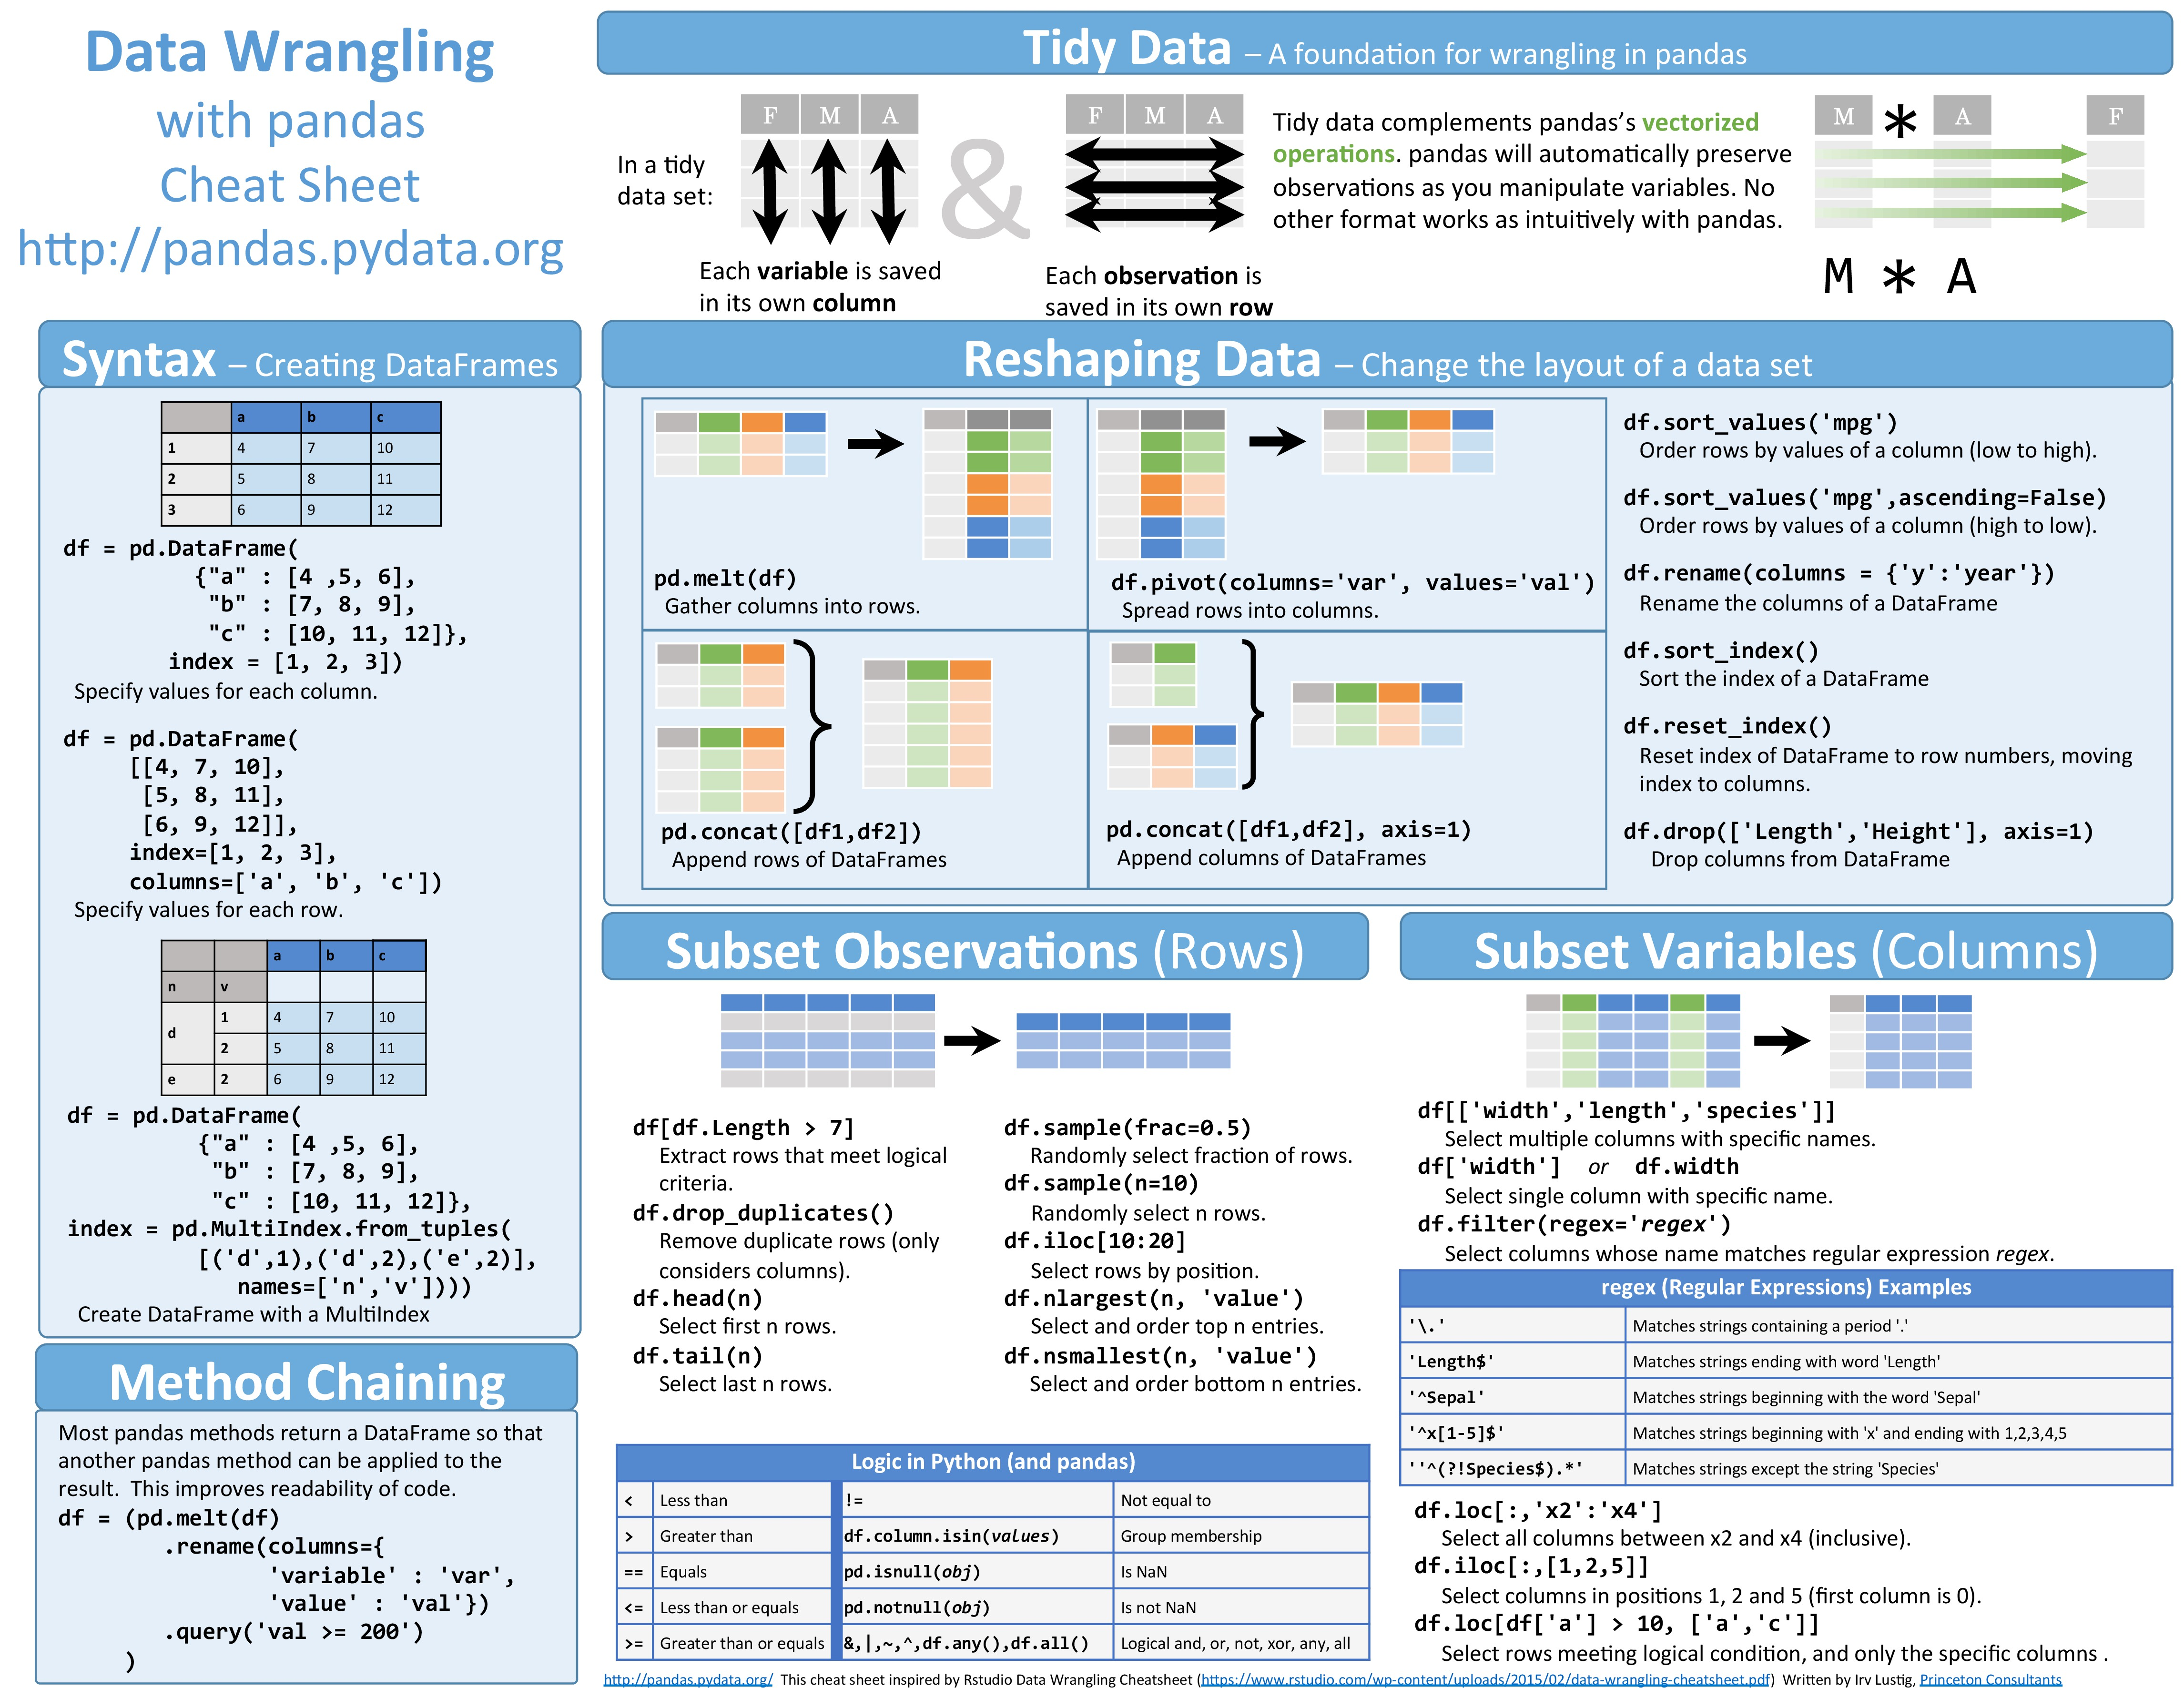

In [1]:
from IPython.display import Image
Image(filename="./images/pandas_data_wrangling_01.jpg")

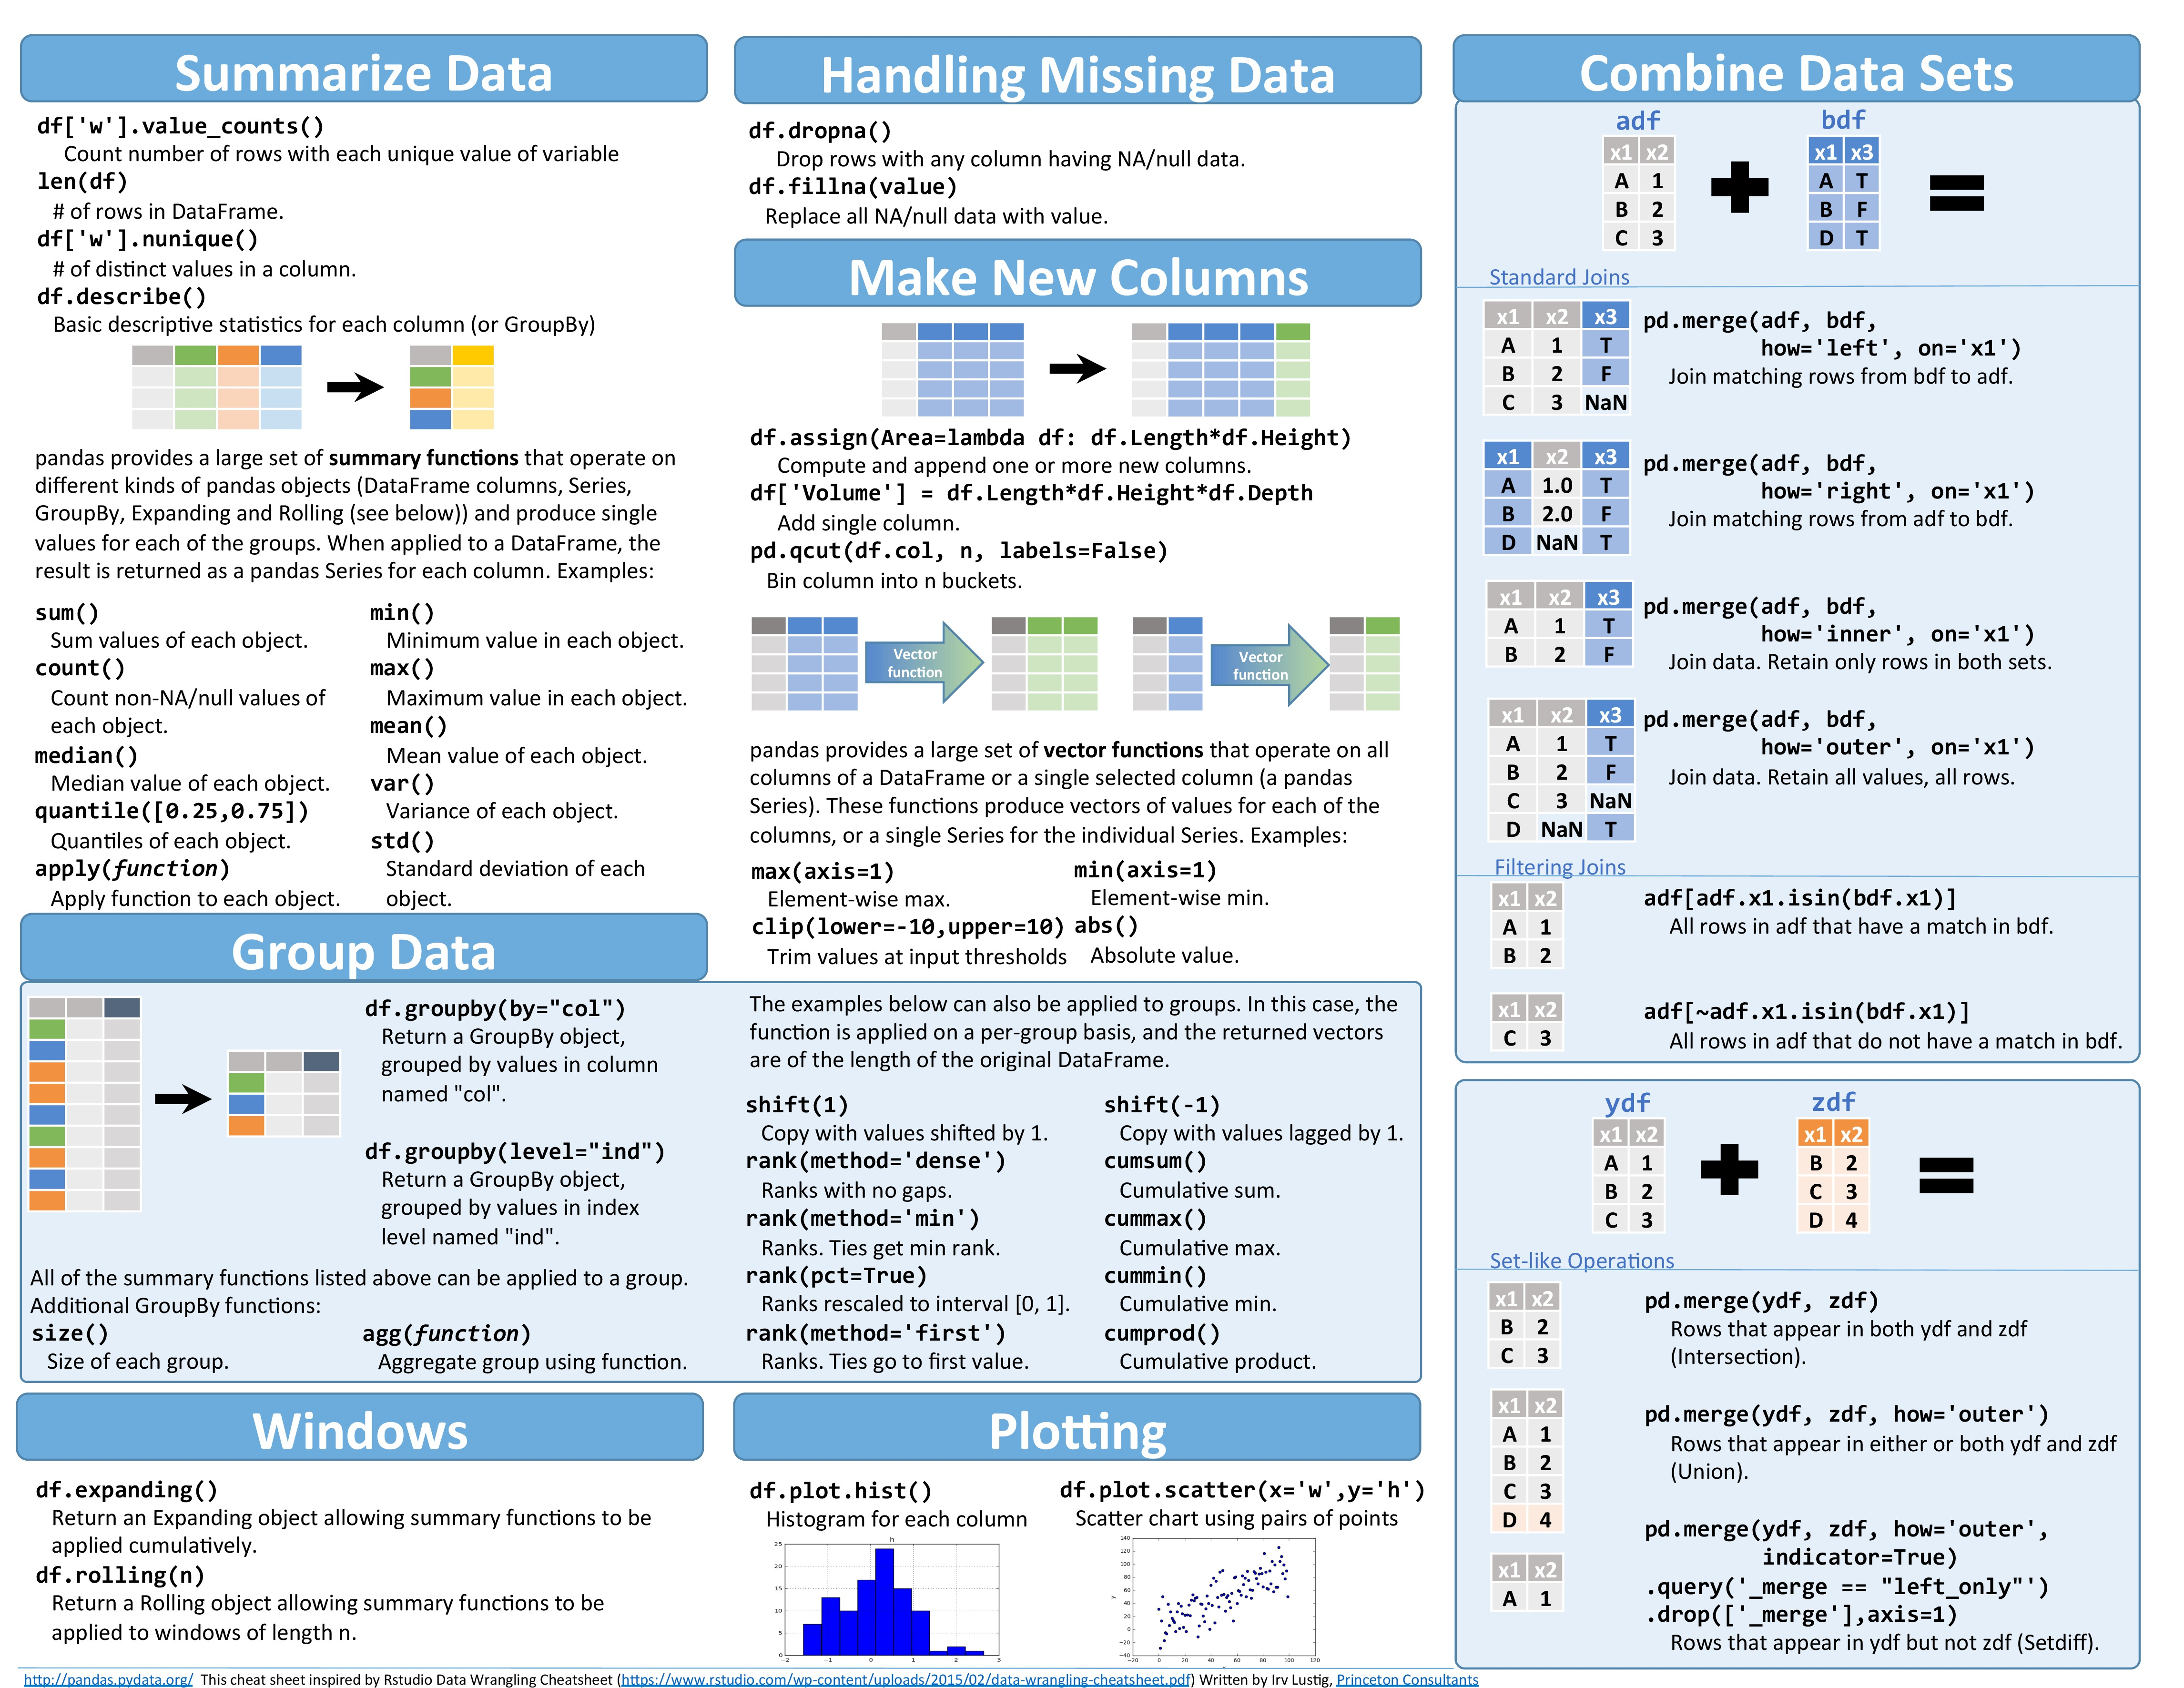

In [2]:
Image(filename="./images/pandas_data_wrangling_02.jpg")

In [3]:
import pandas as pd
data = pd.read_csv("./data/customer-churn-model/Customer Churn Model.txt")
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

## Crear un subconjunto de datos

Puede que no queramos trabajar con todas las columnas o filas de un dataset y queramos trabajar únicamente con un subconjunto de ellas.

In [4]:
account_lenght = data["Account Length"]
account_lenght.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

El objeto resultante no es de tipo `dataframe` sino que es de tipo `series`. 

In [5]:
type(account_lenght)

pandas.core.series.Series

Para extraer más de una columna:

In [6]:
subset = data[["Account Length", "Phone", "Eve Charge", "Day Calls"]]
subset.head()

Account Length     Phone  Eve Charge  Day Calls
0             128  382-4657       16.78        110
1             107  371-7191       16.62        123
2             137  358-1921       10.30        114
3              84  375-9999        5.26         71
4              75  330-6626       12.61        113

In [7]:
type(subset)

pandas.core.frame.DataFrame

In [8]:
desired_columns = ["Account Length", "Phone", "Eve Charge", "Day Calls"]
subset = data[desired_columns]
subset.head()

Account Length     Phone  Eve Charge  Day Calls
0             128  382-4657       16.78        110
1             107  371-7191       16.62        123
2             137  358-1921       10.30        114
3              84  375-9999        5.26         71
4              75  330-6626       12.61        113

In [9]:
# Columnas que no deseamos
no_desired_columns = ["Account Length", "VMail Message", "Day Calls"]
no_desired_columns

['Account Length', 'VMail Message', 'Day Calls']

In [10]:
# Lista completa de columnas
all_columns_list = data.columns.values.tolist()
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [11]:
# Columnas que no deseamos
sublist = [col for col in all_columns_list if col not in no_desired_columns]
sublist

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [12]:
subset = data[sublist]
subset.head()

State  Area Code     Phone Int'l Plan VMail Plan  Day Mins  Day Charge  \
0    KS        415  382-4657         no        yes     265.1       45.07   
1    OH        415  371-7191         no        yes     161.6       27.47   
2    NJ        415  358-1921         no         no     243.4       41.38   
3    OH        408  375-9999        yes         no     299.4       50.90   
4    OK        415  330-6626        yes         no     166.7       28.34   

   Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   

   Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0       10.0           3         2.70               1  False.  
1       13.7           3         3.70               1  False.  
2       12.2           5         3.29               0  False.  
3        6.6           7         1.78               2  False.  
4       10.1           3         2.73               3  False.

## Subconjunto de filas

In [13]:
data[10:18] # Subconjunto de filas de la 10 a la 18 (sin incluir esta última)

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
10    IN              65        415  329-6603         no         no   
11    RI              74        415  344-9403         no         no   
12    IA             168        408  363-1107         no         no   
13    MT              95        510  394-8006         no         no   
14    IA              62        415  366-9238         no         no   
15    NY             161        415  351-7269         no         no   
16    ID              85        408  350-8884         no        yes   
17    VT              93        510  386-2923         no         no   

    VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
10              0     129.1        137       21.95   ...           83   
11              0     187.7        127       31.91   ...          148   
12              0     128.8         96       21.90   ...           71   
13              0     156.6         88       26.62   ...           75   
14              0     120.7         70       20.52   ...           76   
15              0     332.9         67       56.59   ...           97   
16             27     196.4        139       33.39   ...           90   
17              0     190.7        114       32.42   ...          111   

    Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
10       19.42       208.8          111          9.40       12.7           6   
11       13.89       196.0           94          8.82        9.1           5   
12        8.92       141.1          128          6.35       11.2           2   
13       21.05       192.3          115          8.65       12.3           5   
14       26.11       203.0           99          9.14       13.1           6   
15       27.01       160.6          128          7.23        5.4           9   
16       23.88        89.3           75          4.02       13.8           4   
17       18.55       129.6          121          5.83        8.1           3   

    Intl Charge  CustServ Calls  Churn?  
10         3.43               4   True.  
11         2.46               0  False.  
12         3.02               1  False.  
13         3.32               3  False.  
14         3.54               4  False.  
15         1.46               4   True.  
16         3.73               1  False.  
17         2.19               3  False.  

[8 rows x 21 columns]

In [14]:
# Usuarios con Day Mins > 200
data2 = data[data["Day Mins"]>200]
data2.shape

(1186, 21)

In [15]:
# Usuarios de Nueva York
data2 = data[data["State"] == "NY"]
data2.shape

(83, 21)

In [16]:
# AND --> &
# OR --> |

In [17]:
# Usuarios de Nueva York y que superen los 300 minutos diarios
data3 = data[(data["Day Mins"]>300) & (data["State"]=="NY")]
data3.shape

(2, 21)

In [18]:
# Usuarios de Nueva York o que superen los 300 minutos diarios
data3 = data[(data["Day Mins"]>300) | (data["State"]=="NY")]
data3.shape

(124, 21)

In [19]:
# Minutos de día, de noche y longitud de la cuenta de los primeros 50 individuos. Primer corchete para las columnas, segundo corchete para las filas
subset_first_50 = data[["Day Mins", "Night Mins", "Account Length"]][:50]
subset_first_50

Day Mins  Night Mins  Account Length
0      265.1       244.7             128
1      161.6       254.4             107
2      243.4       162.6             137
3      299.4       196.9              84
4      166.7       186.9              75
5      223.4       203.9             118
6      218.2       212.6             121
7      157.0       211.8             147
8      184.5       215.8             117
9      258.6       326.4             141
10     129.1       208.8              65
11     187.7       196.0              74
12     128.8       141.1             168
13     156.6       192.3              95
14     120.7       203.0              62
15     332.9       160.6             161
16     196.4        89.3              85
17     190.7       129.6              93
18     189.7       165.7              76
19     224.4       192.8              73
20     155.1       208.8             147
21      62.4       209.6              77
22     183.0       181.8             130
23     110.4       189.6             111
24      81.1       237.0             132
25     124.3       250.7             174
26     213.0       182.7              57
27     134.3       102.1              54
28     190.0       181.5              20
29     119.3       178.7              49
30      84.8       250.5             142
31     226.1       246.2              75
32     212.0       293.3             172
33     249.6       280.2              12
34     176.8       213.5              57
35     220.0       152.8              72
36     146.3       129.3              36
37     130.8       227.8              78
38     203.9       101.7             136
39     140.4       188.3             149
40     126.3       187.8              98
41     173.1       122.2             135
42     124.8       311.5              34
43      85.8       178.5             160
44     154.0       265.3              64
45     120.9       163.1              59
46     211.3       134.7              65
47     187.0       242.2             142
48     159.1       143.2             119
49     133.2        70.6              97

Usando `iloc`, puede filtrarse por posición

In [20]:
data.iloc[1:10, 3:6] # Filas de la 1 la 10 y Columnas de 3 a la 6

Phone Int'l Plan VMail Plan
1  371-7191         no        yes
2  358-1921         no         no
3  375-9999        yes         no
4  330-6626        yes         no
5  391-8027        yes         no
6  355-9993         no        yes
7  329-9001        yes         no
8  335-4719         no         no
9  330-8173        yes        yes

In [21]:
data.iloc[1:10, [2, 5, 7]] # Filas de la 1 la 10 y Columnas 2, 5 y 7

Area Code VMail Plan  Day Mins
1        415        yes     161.6
2        415         no     243.4
3        408         no     299.4
4        415         no     166.7
5        510         no     223.4
6        510        yes     218.2
7        415         no     157.0
8        408         no     184.5
9        415        yes     258.6

Usando `loc` pueden especificarse etiquetas

In [22]:
data.loc[[1,5,8,36], ["Area Code", "VMail Plan", "Day Mins"]]

Area Code VMail Plan  Day Mins
1         415        yes     161.6
5         510         no     223.4
8         408         no     184.5
36        408        yes     146.3

## Añadir nuevas columnas

In [23]:
data["Total Mins"] = data["Day Mins"] + data["Night Mins"]
data["Total Mins"].head()

0    509.8
1    416.0
2    406.0
3    496.3
4    353.6
Name: Total Mins, dtype: float64

In [24]:
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge     ...      Eve Charge  \
0             25     265.1        110       45.07     ...           16.78   
1             26     161.6        123       27.47     ...           16.62   
2              0     243.4        114       41.38     ...           10.30   
3              0     299.4         71       50.90     ...            5.26   
4              0     166.7        113       28.34     ...           12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  Total Mins  
0               1  False.       509.8  
1               1  False.       416.0  
2               0  False.       406.0  
3               2  False.       496.3  
4               3  False.       353.6  

[5 rows x 22 columns]

## Generación aleatoria de números

In [25]:
import numpy as np

# Obtiene un nº aleatorio entre 1 y 100
np.random.randint(1,100)

7

La forma más clásica de generar un número aleatorio es entre 0 y 1 (con decimales)

In [26]:
np.random.random()

0.265278811544134

In [27]:
# Función que genera una lista de n números aleatorios enteros dentro del intervalo (a,b)
def randint_list(n, a, b):
    x = []
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

In [28]:
randint_list(25, 1, 50)

[38,
 27,
 27,
 13,
 32,
 33,
 22,
 44,
 33,
 38,
 45,
 35,
 37,
 17,
 17,
 10,
 16,
 20,
 37,
 2,
 22,
 32,
 47,
 1,
 14]

### Shuffling

In [29]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [30]:
np.random.shuffle(a)
a

array([92, 61, 60,  4, 90, 17, 27, 68, 80, 81, 22, 25, 11, 34, 42, 88, 58,
       97, 62, 76, 41,  0, 12, 69, 51, 43, 57, 31, 52, 82, 18, 36, 48, 93,
       23, 96, 67, 84, 20, 38, 86, 32, 10, 45, 72, 99, 95, 63,  3, 91, 83,
       87, 37, 21, 39, 85, 55, 56, 79, 73,  6,  9, 40, 35, 19, 70,  5, 78,
       14, 77,  7, 59,  1, 29, 33, 13, 65, 49, 50, 94,  8, 54, 44, 53, 24,
       15, 98, 26, 66, 75,  2, 64, 16, 71, 74, 46, 47, 30, 89, 28])

### Choice

In [31]:
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [32]:
np.random.choice(all_columns_list)   # Se elige aleatoriamente un elemento de la lista

"Int'l Plan"

### Seed

Para poder reproducir la aleatoriedad repetidas veces (por ejemplo, en diferentes ordenadores) y que se obtengan los mismos resultados se utiliza la función `seed`.

In [33]:
# Cuantas veces ejecutemos este código siempre se obtendrán los mismos números aleatorios
np.random.seed(2018)
for i in range (5):
    print(np.random.random())

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422
